# Cross validation

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

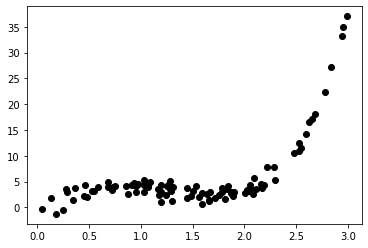

In [7]:
np.random.seed(123)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)
plt.plot(x, y, 'ok');
plt.show()

# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [8]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

results = []
names = []


In [9]:
seed=123
kfold = model_selection.KFold(n_splits=10)
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [10]:
for name, model in models:
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -3.910595 (0.702448)
PR2: -2.922856 (0.308112)
PR3: -1.048559 (0.182818)
PR4: -0.798901 (0.150318)
PR5: -0.817215 (0.144267)
PR6: -0.822522 (0.159449)
PR25: -1.181341 (0.484210)


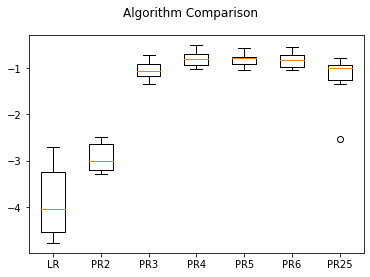

In [11]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt>. 

In [12]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 4}

In [13]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=True)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(x, y)
grid.best_params_
grid.best_estimator_.predict(x)

array([ 3.69036863,  4.07664248,  3.79700921,  2.45093303,  4.40755155,
        3.47109769, 33.48085238,  3.39753058,  2.95096803,  3.71963011,
        4.00056546,  4.76503317,  3.33482297,  0.94830761,  3.6754068 ,
        5.1322869 ,  3.3274656 ,  3.23241595,  2.55657893,  2.55485995,
        2.59118323, 13.03820939,  4.58908325,  2.42958004,  4.5146691 ,
        4.06255105,  3.91356023,  3.80825748,  4.08485083,  2.56013012,
        1.71088461,  3.37833258,  3.40346033,  2.84028043,  3.44753147,
        4.080358  ,  3.44299965, 18.28554836, 26.26225558,  2.77257558,
        2.50462832,  2.20951568,  4.07333897,  3.5412988 , 14.88655879,
        3.95525738,  2.93239692, 34.52651869,  2.63739115,  2.43836369,
        2.30918045, 10.81915397,  2.39962858,  2.48028382,  4.00218818,
        4.08654678,  3.52290754,  3.31740858, 15.97319789,  2.7046143 ,
        3.07380833,  2.37305144,  2.51151177,  3.17769816, 12.31996634,
        1.50943313,  6.37998025,  3.91621481,  3.4734593 ,  2.38

# Zadanie 
Dla danych reklamowych, obejmujących sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [15]:
import pandas as pd
df_adv = pd.read_csv('Advertising.txt', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


LR: -1.302250 (0.291568)
PR2: -0.441327 (0.119563)
PR3: -0.358775 (0.086618)
PR4: -0.538251 (0.467361)
PR5: -0.737391 (0.479321)
PR6: -2.608092 (2.673158)
PR7: -6.382106 (7.320104)


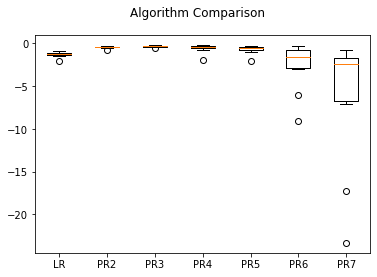

In [17]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR7', make_pipeline(PolynomialFeatures(7), linear_model.LinearRegression()) ))

# evaluate each model in turn
results = []
names = []

seed=123
kfold = model_selection.KFold(n_splits=10)
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

for name, model in models:
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()    

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [18]:
import pandas as pd
df_adv = pd.read_csv('Advertising.txt', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [21]:
from sklearn.model_selection import GridSearchCV
seed=123
kfold = model_selection.KFold(n_splits=10)

grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=True)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(X, y)
grid.best_params_

{'polynomialfeatures__degree': 3}

In [24]:
from sklearn import  metrics
metrics.r2_score(y_pred=grid.best_estimator_.predict(X) , y_true=y )

0.9920754398977076